# LOS color palette

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from los_palette import angles_to_unit_vector, unit_vector_to_hex

In [2]:
ascending_heading = -12
descending_heading = -167
incidence_angle = 34

In [3]:
# def unit_vector_from_angles(heading_angle_degrees, incidence_angle_degrees):
#     # Convert angles to radians
#     heading_angle_start_at_east = 90 - heading_angle_degrees
#     heading_los = heading_angle_start_at_east + 90
#     heading_angle_radians = np.radians(heading_los)

#     incidence_angle_sensor_to_ground = -(90 - incidence_angle_degrees)
#     incidence_angle_radians = np.radians(incidence_angle_sensor_to_ground)

#     # Calculate the vector components
#     x_component = np.cos(heading_angle_radians) * np.cos(incidence_angle_radians)
#     y_component = np.sin(heading_angle_radians) * np.cos(incidence_angle_radians)
#     z_component = np.sin(incidence_angle_radians)

#     # Create a NumPy array for the vector
#     vector = np.array([x_component, y_component, z_component])

#     # Normalize the vector to obtain the unit vector
#     unit_vector = (vector / np.linalg.norm(vector)).round(5)

#     return unit_vector


# def unit_vector_to_rgb(unit_vector):
#     centered_rgb = (unit_vector * 127.5) + 127.5
#     rounded = centered_rgb.round(0).astype(int)
#     return rounded


# def angles_to_rgb(heading_angle_degrees, incidence_angle_degrees, hex=False):
#     unit_vector = unit_vector_from_angles(heading_angle_degrees, incidence_angle_degrees)
#     rgb = unit_vector_to_rgb(unit_vector)
#     r, g, b = rgb
#     if hex:
#         hex_color = f'#{r:02X}{g:02X}{b:02X}'
#         return hex_color
#     return rgb


# def create_line(heading_angle_degrees, incidence_angle_degrees, name):
#     unit_vector = angles_to_unit_vector(heading_angle_degrees, incidence_angle_degrees)
#     point1 = [3,3,3]
#     point2 = point1 + (4 * unit_vector)
#     x, y, z = [[i,j] for i,j in zip(point1, point2)]
#     # color = angles_to_rgb(heading_angle_degrees, incidence_angle_degrees, hex=True)
#     color = unit_vector_to_hex(unit_vector)
    
#     return go.Scatter3d(x=x, y=y, z=z, mode='lines', name=name, line=dict(width=10, color=color))

In [4]:
# import plotly.graph_objects as go

# # TODO check away/towards convention
# trace1 = create_line(ascending_heading, 180+incidence_angle, 'ascending towards sensor')
# trace2 = create_line(ascending_heading, incidence_angle, 'ascending away from sensor')
# trace3 = create_line(descending_heading, 180+incidence_angle, 'descending towards sensor')
# trace4 = create_line(descending_heading, incidence_angle, 'descending away from sensor')
# fig_los = go.Figure(data=[trace1, trace2, trace3, trace4])

# scene_opts = dict(xaxis_title='X', yaxis_title='Y' ,zaxis_title='Z',
#                   xaxis_range=[0, 6], yaxis_range=[0, 6], zaxis_range=[0, 6],
#                   aspectmode='cube')

# fig_los.update_layout(scene=scene_opts, width=1000, height=700)

# fig_los.show()

In [5]:
# import plotly.graph_objects as go

# trace1 = create_line(180, 90, 'east')
# trace2 = create_line(0, 90, 'west')
# trace3 = create_line(0, 0, 'down')
# trace4 = create_line(0, 180, 'up')
# fig_cardinal = go.Figure(data=[trace1, trace2, trace3, trace4])

# scene_opts = dict(xaxis_title='X', yaxis_title='Y' ,zaxis_title='Z',
#                   xaxis_range=[0, 6], yaxis_range=[0, 6], zaxis_range=[0, 6],
#                   aspectmode='cube')

# fig_cardinal.update_layout(scene=scene_opts, width=1000, height=700)

# fig_cardinal.show()

## Color Sphere

In [58]:
import plotly.graph_objects as go
from itertools import product

diamond_template = go.layout.Template()

# Helix equation
horizontal_angles = np.linspace(0, 360, 72)
vertical_angles = np.linspace(0, 180, 36)
unit_vectors = [angles_to_unit_vector(h, v) for h, v in product(horizontal_angles, vertical_angles)]
colors = [unit_vector_to_hex(u) for u in unit_vectors]
x, y, z = [[row[i] for row in unit_vectors] for i in range(3)]

points = go.Scatter3d(x=x, y=y, z=z, mode='markers', text=colors, showlegend=False, marker=dict(size=21, color=colors, opacity=1))
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig = go.Figure(data=[points], layout=layout)
scene_opts = dict(xaxis_range=[-1, 1], yaxis_range=[-1, 1], zaxis_range=[-1, 1], aspectmode='cube', xaxis_title='X Component', yaxis_title='Y Component', zaxis_title='Z Component', camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)))

fig.update_layout(template=diamond_template, width=800, height=800, margin=dict(l=10, r=10, t=10, b=10), scene=scene_opts)
fig.show()
fig.write_html('./los_colorsphere.html')

## Earthquake Example

In [9]:
# Define the fault parameters (location and slip)
grid_size = 100
fault_location = grid_size // 2  # Middle of the grid as the fault location
fault_slip = 10.0  # Amount of horizontal slip

# Calculate deformation due to the strike-slip fault
deformation = np.zeros((grid_size, grid_size))
for i in range(grid_size):
    for j in range(grid_size):
        if i < fault_location:
            deformation[i,j] = fault_slip * (i / fault_location)
        else:
            deformation[i,j] = -fault_slip * ((grid_size - i) / fault_location)


In [10]:
from matplotlib.colors import LinearSegmentedColormap

east_color = angles_to_rgb(180, 90, hex=True)
west_color = angles_to_rgb(0, 90, hex=True)
custom_cmap = LinearSegmentedColormap.from_list('custom diverging', [west_color, 'white', east_color], N=100)

# Plot the deformation
plt.figure(figsize=(8, 6))
plt.imshow(deformation, cmap=custom_cmap)
plt.colorbar(label='W-E Deformation (meters)')
plt.title('Deformation Due to Strike-Slip Fault')
plt.show()

NameError: name 'angles_to_rgb' is not defined

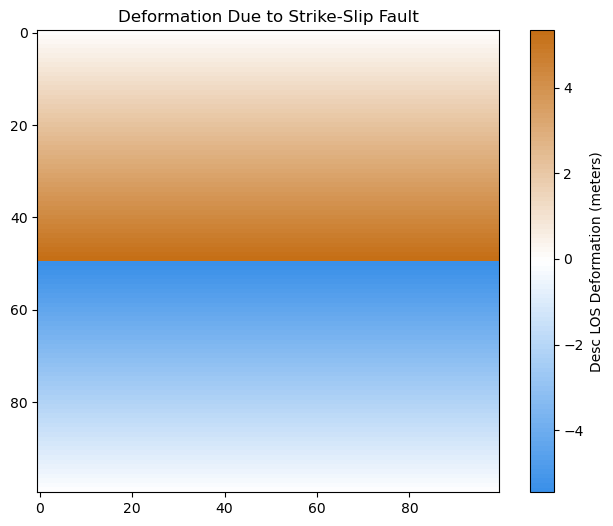

In [9]:
from matplotlib.colors import LinearSegmentedColormap

descending_los = unit_vector_from_angles(descending_heading, incidence_angle)
vectorized_function = np.vectorize(lambda x: np.dot([x,0,0], descending_los))
descending_los_displacement = vectorized_function(deformation)

away_color = angles_to_rgb(descending_heading, incidence_angle, hex=True)
towards_color = angles_to_rgb(descending_heading, 180+incidence_angle, hex=True)
desc_cmap = LinearSegmentedColormap.from_list('custom diverging', [towards_color, 'white', away_color], N=100)

# Plot the deformation
plt.figure(figsize=(8, 6))
plt.imshow(descending_los_displacement, cmap=desc_cmap)
plt.colorbar(label='Desc LOS Deformation (meters)')
plt.title('Deformation Due to Strike-Slip Fault')
plt.show()

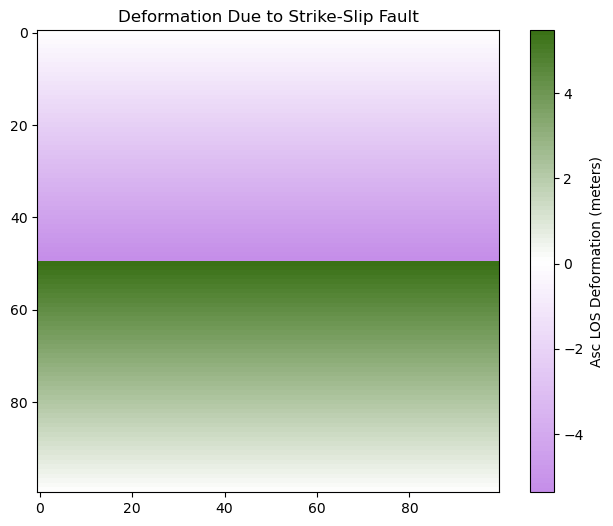

In [10]:
from matplotlib.colors import LinearSegmentedColormap

ascending_los = unit_vector_from_angles(ascending_heading, incidence_angle)
vectorized_function = np.vectorize(lambda x: np.dot([x,0,0], ascending_los))
ascending_los_displacement = vectorized_function(deformation)

away_color = angles_to_rgb(ascending_heading, incidence_angle, hex=True)
towards_color = angles_to_rgb(ascending_heading, 180+incidence_angle, hex=True)
asc_cmap = LinearSegmentedColormap.from_list('custom diverging', [towards_color, 'white', away_color], N=100)

# Plot the deformation
plt.figure(figsize=(8, 6))
plt.imshow(ascending_los_displacement, cmap=asc_cmap)
plt.colorbar(label='Asc LOS Deformation (meters)')
plt.title('Deformation Due to Strike-Slip Fault')
plt.show()

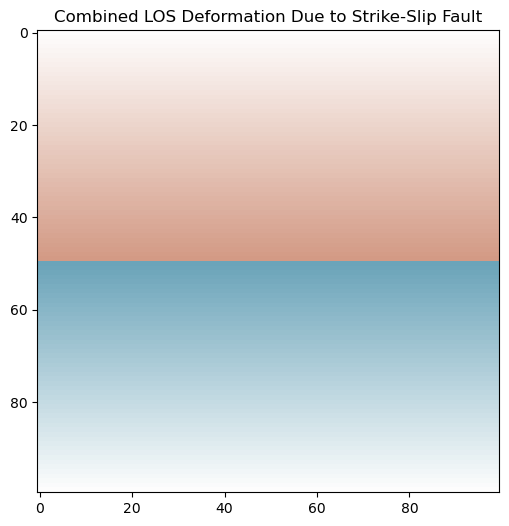

In [11]:
# Plot the deformation
plt.figure(figsize=(8, 6))
plt.imshow(ascending_los_displacement, cmap=asc_cmap, alpha=0.5)
plt.imshow(descending_los_displacement, cmap=desc_cmap, alpha=0.5)
plt.title('Combined LOS Deformation Due to Strike-Slip Fault')
plt.show()

In [4]:
def create_mogi(size, delta_V):
    # Define Mogi source parameters
    # delta_V = 100.0  # Volume change (cubic meters)
    depth = 5.0    # Depth of the source (meters)
    nu = 0.25      # Poisson's ratio
    
    # Create a grid of (x, y) coordinates
    x = np.linspace(-10, 10, size)  # Adjust the range and resolution as needed
    y = np.linspace(-10, 10, size)
    X, Y = np.meshgrid(x, y)

    # Calculate surface displacements for each point in the grid
    mogi = (delta_V / (np.pi * (1 - nu))) * (depth / (X**2 + Y**2 + depth**2)**(3/2))
    return mogi


mogi = create_mogi(100, 100)
mogi[80:100, 80:100] = -create_mogi(20, 100)

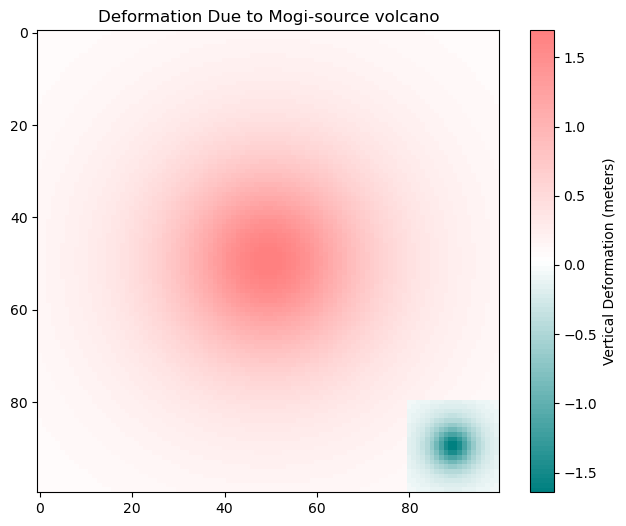

In [14]:
up_color = angles_to_rgb(0, 0, hex=True)
down_color = angles_to_rgb(0, 180, hex=True)
vertical_cmap = LinearSegmentedColormap.from_list('custom diverging', [west_color, 'white', east_color], N=100)

# Plot the deformation
plt.figure(figsize=(8, 6))
plt.imshow(mogi, cmap=vertical_cmap)
plt.colorbar(label='Vertical Deformation (meters)')
plt.title('Deformation Due to Mogi-source volcano')
plt.show()

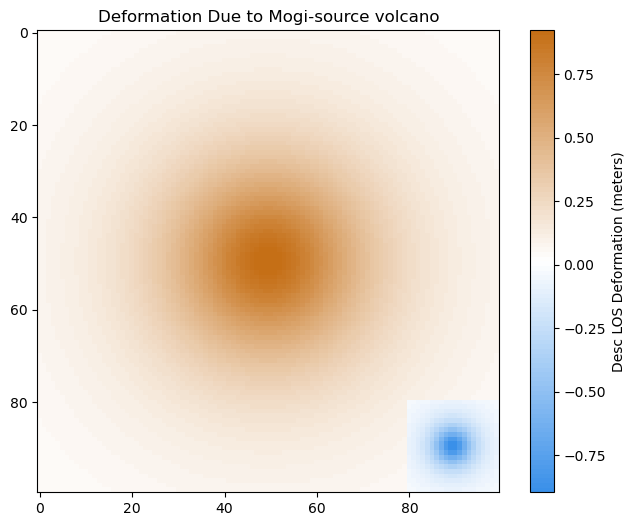

In [15]:
from matplotlib.colors import LinearSegmentedColormap

descending_los = unit_vector_from_angles(descending_heading, incidence_angle)
vectorized_function = np.vectorize(lambda x: np.dot([x,0,0], descending_los))
descending_los_displacement = vectorized_function(mogi)

away_color = angles_to_rgb(descending_heading, incidence_angle, hex=True)
towards_color = angles_to_rgb(descending_heading, 180+incidence_angle, hex=True)
desc_cmap = LinearSegmentedColormap.from_list('custom diverging', [towards_color, 'white', away_color], N=100)

# Plot the deformation
plt.figure(figsize=(8, 6))
plt.imshow(descending_los_displacement, cmap=desc_cmap)
plt.colorbar(label='Desc LOS Deformation (meters)')
plt.title('Deformation Due to Mogi-source volcano')
plt.show()

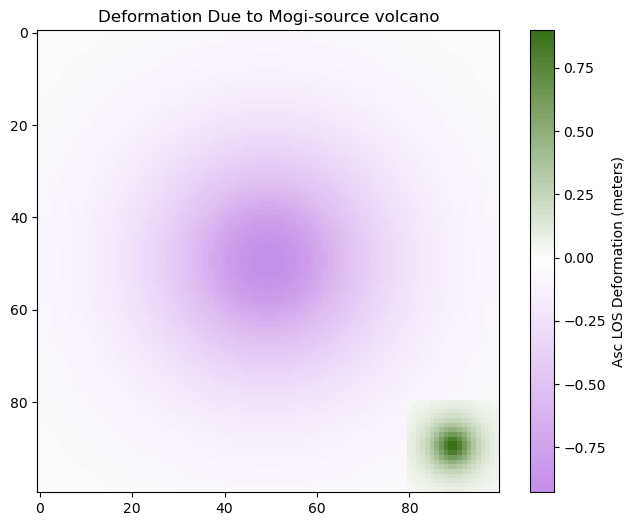

In [16]:
from matplotlib.colors import LinearSegmentedColormap

ascending_los = unit_vector_from_angles(ascending_heading, incidence_angle)
vectorized_function = np.vectorize(lambda x: np.dot([x,0,0], ascending_los))
ascending_los_displacement = vectorized_function(mogi)

away_color = angles_to_rgb(ascending_heading, incidence_angle, hex=True)
towards_color = angles_to_rgb(ascending_heading, 180+incidence_angle, hex=True)
asc_cmap = LinearSegmentedColormap.from_list('custom diverging', [towards_color, 'white', away_color], N=100)

# Plot the deformation
plt.figure(figsize=(8, 6))
plt.imshow(ascending_los_displacement, cmap=asc_cmap)
plt.colorbar(label='Asc LOS Deformation (meters)')
plt.title('Deformation Due to Mogi-source volcano')
plt.show()

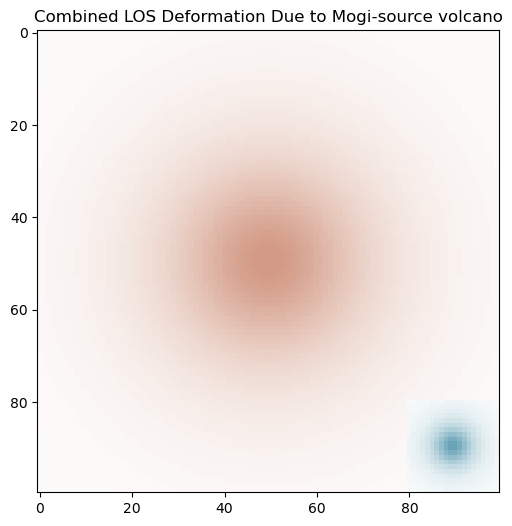

In [17]:
# Plot the deformation
plt.figure(figsize=(8, 6))
plt.imshow(ascending_los_displacement, cmap=asc_cmap, alpha=0.5)
plt.imshow(descending_los_displacement, cmap=desc_cmap, alpha=0.5)
plt.title('Combined LOS Deformation Due to Mogi-source volcano')
plt.show()

In [1]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import column
import numpy as np

# Sample data
num_points = 100
x = np.random.rand(num_points)
y = np.random.rand(num_points)
z = np.random.rand(num_points)

# Create a data source
source = ColumnDataSource(data=dict(x=x, y=y, z=z))

# Create the 3D scatter plot
plot = figure(width=800, height=600, title="3D Scatter Plot")
plot.scatter(x='x', y='y', z='z', source=source, size=8, color='blue')

# Set axis labels
plot.xaxis.axis_label = 'X-Axis'
plot.yaxis.axis_label = 'Y-Axis'
plot.zaxis.axis_label = 'Z-Axis'

# Show the plot
show(plot)

AttributeError: unexpected attribute 'z' to Scatter, possible attributes are angle, angle_units, decorations, fill_alpha, fill_color, hatch_alpha, hatch_color, hatch_extra, hatch_pattern, hatch_scale, hatch_weight, hit_dilation, js_event_callbacks, js_property_callbacks, line_alpha, line_cap, line_color, line_dash, line_dash_offset, line_join, line_width, marker, name, size, subscribed_events, syncable, tags, x or y

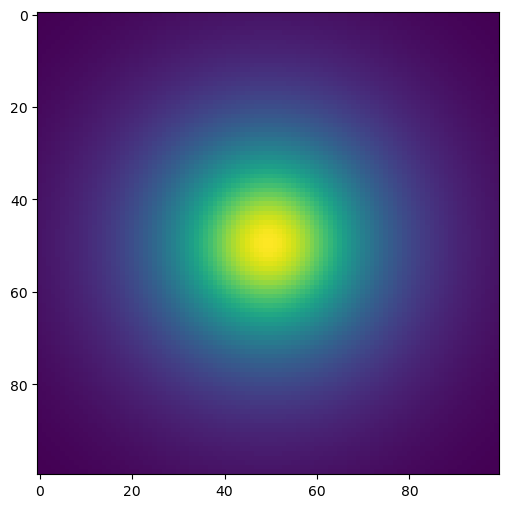

In [5]:
 mogi = create_mogi(100, 100)

# Plot the deformation
fig, ax = plt.subplots(figsize=(8,6))
ax.imshow(mogi)

In [41]:
from okada_wrapper import dc3d0wrapper, dc3dwrapper
import numpy as np
import matplotlib.pyplot as plt
# Yu Jiang
# University of Liverpool
# Dec 8, 2021

##################
# 1 input
##################
# (1) observation points
roi_x = 100000 # length of roi (unit: meter)
roi_y = 100000 # width of roi (unit: meter)
dxy = 100 # resolution of roi (unit: meter)
n = (int(roi_x/dxy), int(roi_y/dxy))
x_1d = np.linspace(-roi_x/2, roi_x/2, n[0])
y_1d = np.linspace(-roi_y/2, roi_y/2, n[1])
x_2d = np.zeros((n[0]*n[1],1))
y_2d = np.zeros((n[0]*n[1],1))

# (2) satellite parameters
wavelength_sentinel = 0.056 # sentinel-1 wavelength (unit: meter)
wavelength_alos = 0.236 # alos-2 wavelength (unit: meter)

Inc_asc = 36 # ascending satellite incidence angle (unit: degree)
Heading_asc = -11 # ascending satellite heading angle (unit: degree)

Inc_dsc = 41 # descending satellite incidence angle (unit: degree)
Heading_dsc = -169 # descending satellite heading angle (unit: degree)

UEast_asc = -np.cos(Heading_asc*np.pi/180)*np.sin(Inc_asc*np.pi/180)
UNorth_asc = np.sin(Heading_asc*np.pi/180)*np.sin(Inc_asc*np.pi/180)
UVert_asc = np.cos(Inc_asc*np.pi/180)

UEast_dsc = -np.cos(Heading_dsc*np.pi/180)*np.sin(Inc_dsc*np.pi/180)
UNorth_dsc = np.sin(Heading_dsc*np.pi/180)*np.sin(Inc_dsc*np.pi/180)
UVert_dsc = np.cos(Inc_dsc*np.pi/180)

# (3) fault parameters 
fault_length = 20000 # fault length (unit: meter)
fault_width = 7000 # fault width (unit: meter)
fault_mid_depth = 3500 # middle depth (unit: meter)
fault_strike = 280 # fault strike angle (unit: degree)
fault_dip = 85 # fault dip angle (unit: degree)
fault_strike_slip = 1.0 # fault strike slip (unit: meter)
fault_dip_slip = 1.8 # fault dip angle (unit: meter)

nu = 0.25
mu = 1.0
lmda = 2 * mu * nu / (1 - 2 * nu)
alpha = (lmda + mu) / (lmda + 2 * mu)

##################
# 2 calculation
##################
ux_2d = np.zeros((n[0]*n[1],1))
uy_2d = np.zeros((n[0]*n[1],1))
uz_2d = np.zeros((n[0]*n[1],1))
k = 0
for i in range(n[0]):
    for j in range(n[1]):
        success, u, grad_u = dc3dwrapper(alpha,[x_1d[i], y_1d[j], 0], fault_mid_depth, fault_dip,[-fault_length/2,fault_length/2], [-fault_width/2,fault_width/2],[fault_strike_slip, fault_dip_slip, 0.0])
        x_2d[k] = x_1d[i]
        y_2d[k] = y_1d[j]
        ux_2d[k] = -u[1]
        uy_2d[k] = u[0]
        uz_2d[k] = u[2]
        k = k+1

ULos_asc = UEast_asc*ux_2d + UNorth_asc*uy_2d + UVert_asc*uz_2d # surface deformation in satellite line-of-sight direction
ULos_asc_sentinel = -ULos_asc*(4*np.pi)/wavelength_sentinel # convert unit from meter to radian
ULos_asc_alos = -ULos_asc*(4*np.pi)/wavelength_alos # convert unit from meter to radian

ULos_dsc = UEast_dsc*ux_2d + UNorth_dsc*uy_2d + UVert_dsc*uz_2d # surface deformation in satellite line-of-sight direction
ULos_dsc_sentinel = -ULos_dsc*(4*np.pi)/wavelength_sentinel # convert unit from meter to radian
ULos_dsc_alos = -ULos_dsc*(4*np.pi)/wavelength_alos # convert unit from meter to radian

rx = np.cos((-fault_strike+90)*np.pi/180)*x_2d - np.sin((-fault_strike+90)*np.pi/180)*y_2d
ry = np.sin((-fault_strike+90)*np.pi/180)*x_2d + np.cos((-fault_strike+90)*np.pi/180)*y_2d

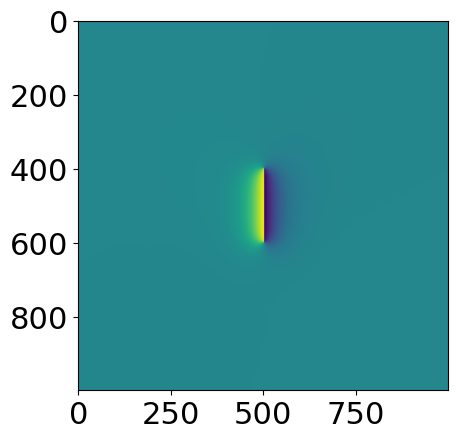

In [65]:
plt.imshow(uz_2d.reshape(1000,1000))

In [66]:
pixel_size = rx[1] - rx[0]
rx = (rx-rx[0]) / pixel_size

In [68]:
space = rx[2:] - rx[1:-1]

In [70]:
np.all(np.isclose(space, 1))

False

In [73]:
space.shape

(999998, 1)

In [72]:
sum(np.isclose(space, 1))

array([998999])

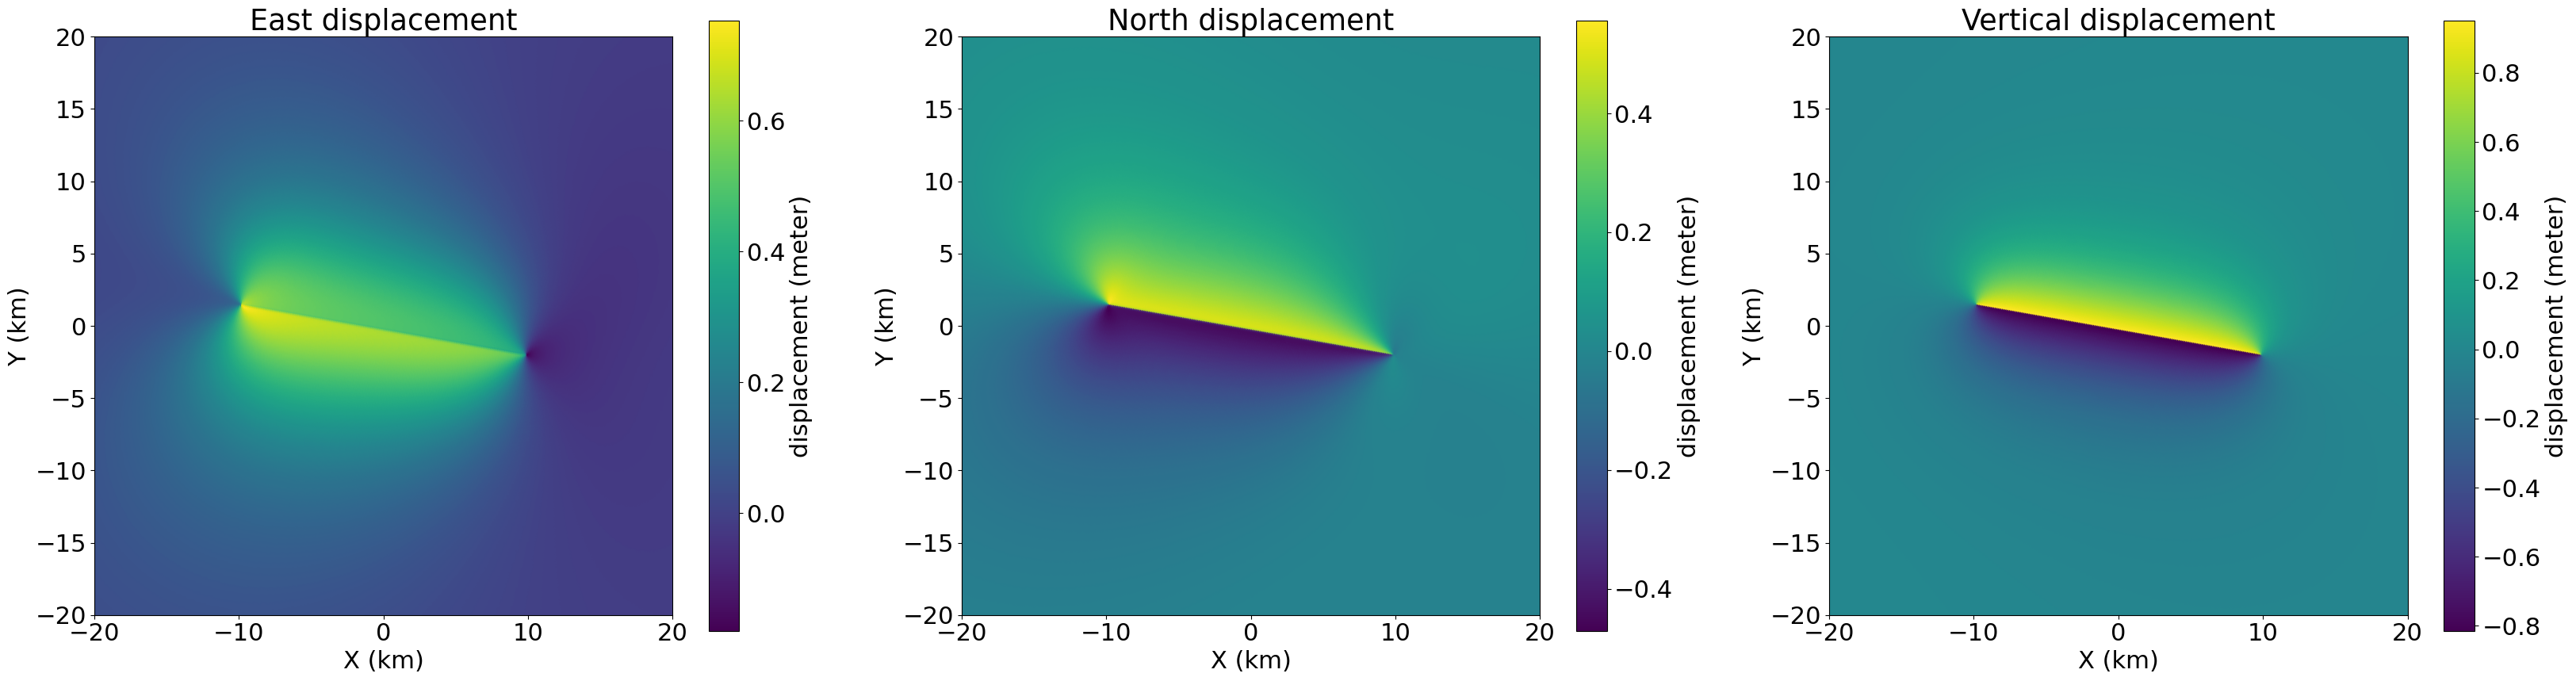

In [43]:
##################
# 3 plot surface deformation: East/North/Vertical direction
##################
# East
plt.figure(figsize=(40, 10))
plt.subplot(1, 3, 1)
plt.axis('equal')
plt.scatter(rx/1000, ry/1000, s=5, marker='o', c= ux_2d)
cbar = plt.colorbar()
cbar.ax.set_ylabel('displacement (meter)', rotation=90)
plt.rcParams.update({'font.size': 22})
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('East displacement')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.gca().set_aspect('equal', adjustable='box')

# North
plt.subplot(1, 3, 2)
plt.axis('equal')
plt.scatter(rx/1000, ry/1000, s=5, marker='o', c= uy_2d)
cbar = plt.colorbar()
cbar.ax.set_ylabel('displacement (meter)', rotation=90)
plt.rcParams.update({'font.size': 22})
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('North displacement')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.gca().set_aspect('equal', adjustable='box')

# Vertical
plt.subplot(1, 3, 3)
plt.axis('equal')
plt.scatter(rx/1000, ry/1000, s=5, marker='o', c= uz_2d)
cbar = plt.colorbar()
cbar.ax.set_ylabel('displacement (meter)', rotation=90)
plt.rcParams.update({'font.size': 22})
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Vertical displacement')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()